In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
%matplotlib inline

## 1 Explore the data

#### 1. Load the data. You may drop id or just ignore it in the rest of your analysis.

In [2]:
wdbc = pd.read_csv('C:/Users/Manisha/Desktop/UW/MSIM 2017 - 2019/03. Spring Quarter 2017/INFX 574/Problem Sets/PS 4/wdbc.csv.bz2')

In [3]:
# Load the data
wdbc.head()
wdbc_reduced = wdbc.drop(['id'],axis=1)
wdbc_reduced['diagnosis'] = (wdbc_reduced['diagnosis'] == 'M')+ 0
wdbc1 = wdbc_reduced

wdbc_reduced.head()

,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 2. Create a summary table where you show means, ranges, and number of missings for each variable. In addition, add correlation between the diagnosis and the corresponding feature. You may include more statistics you consider useful.

In [4]:
print("Dimensions of the dataset:",wdbc.shape,"\n")

# Extracting mising value information
wdbc_reduced.info()

# Calculating Mean and Standard Deviation
summ = wdbc_reduced.describe()
summ = summ.T
summ = pd.DataFrame(data=summ,columns=['mean','std'])

Dimensions of the dataset: (569, 32) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis            569 non-null int32
radius.mean          569 non-null float64
texture.mean         569 non-null float64
perimeter.mean       569 non-null float64
area.mean            569 non-null float64
smoothness.mean      569 non-null float64
compactness.mean     569 non-null float64
concavity.mean       569 non-null float64
concpoints.mean      569 non-null float64
symmetry.mean        569 non-null float64
fracdim.mean         569 non-null float64
radius.se            569 non-null float64
texture.se           569 non-null float64
perimeter.se         569 non-null float64
area.se              569 non-null float64
smoothness.se        569 non-null float64
compactness.se       569 non-null float64
concavity.se         569 non-null float64
concpoints.se        569 non-null float64
symmetry.se          569 non-null float64
fracdim.se        

In [5]:
a = wdbc_reduced.max(axis=0)
b = wdbc_reduced.min(axis=0)
summ['Range'] = a - b
summ['Missing Count'] = 0
summ['Correlation with Diagnosis'] = wdbc_reduced.corr()['diagnosis']
summ

,mean,std,Range,Missing Count,Correlation with Diagnosis
diagnosis,0.372583,0.483918,1.000000,0,1.000000
radius.mean,14.127292,3.524049,21.129000,0,0.730029
texture.mean,19.289649,4.301036,29.570000,0,0.415185
perimeter.mean,91.969033,24.298981,144.710000,0,0.742636
area.mean,654.889104,351.914129,2357.500000,0,0.708984
smoothness.mean,0.096360,0.014064,0.110770,0,0.358560
compactness.mean,0.104341,0.052813,0.326020,0,0.596534
concavity.mean,0.088799,0.079720,0.426800,0,0.696360
concpoints.mean,0.048919,0.038803,0.201200,0,0.776614
symmetry.mean,0.181162,0.027414,0.198000,0,0.330499


#### 3. Graphical exploration. Make a number of scatterplots where you explore the relationship between features and the diagnosis.

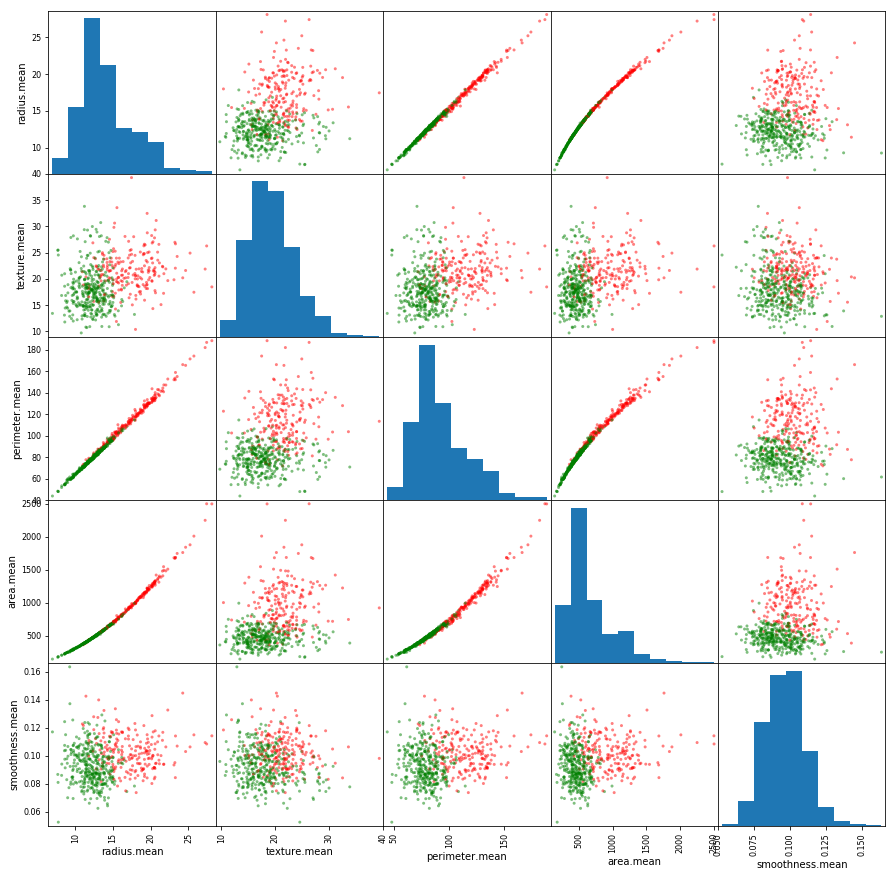

In [6]:
features = list(wdbc_reduced.columns[0:6])
color_func ={0:'green',1:'red'}
colors = wdbc_reduced['diagnosis'].map(lambda x: color_func.get(x))
pd.plotting.scatter_matrix(wdbc[features],c=colors,alpha=0.5,figsize=(15,15))
plt.show()

Based on the above graph, we can make following observations:
 * Higher the value of permimeter.mean and area.mean of cell nucleus, the more chances of malignant cancer.
 * The higher the values of smoothness.mean, area.mean and perimeter.mean with higher texture.mean, more chances of cancer being malignant.
 * with smoothness.mean ranging between0.075 and 0.125 and area.mean between 1000 and 2000, it is more likely cancer is malignant.

## 2.1 kNN Case

#### 1. Predict the diagnosis on a grid (say, 100x100) that covers the range of the explanatory variables.
Use kNN with k = 3..7 (pick just one value). This gives you 100x100 predicted diagnoses.
Note: if your features are of very dierent scale, you should either scale these into a roughly equal
scale, or use a metric that does this with you. Consult James et al. (2015, p 217).

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
X = pd.DataFrame(wdbc,columns=['radius.mean','texture.mean'])
y = wdbc_reduced['diagnosis']

In [9]:
n = 14
p = 1
wdbc_clf = KNeighborsClassifier(n_neighbors=n,p=p)
wdbc_clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=14, p=1,
           weights='uniform')

#### 2. Plot the actual data and the decision boundary on the same plot. Ensure that actual observations and predictions are clearly distinguishable, and that one can easily understand the color code.

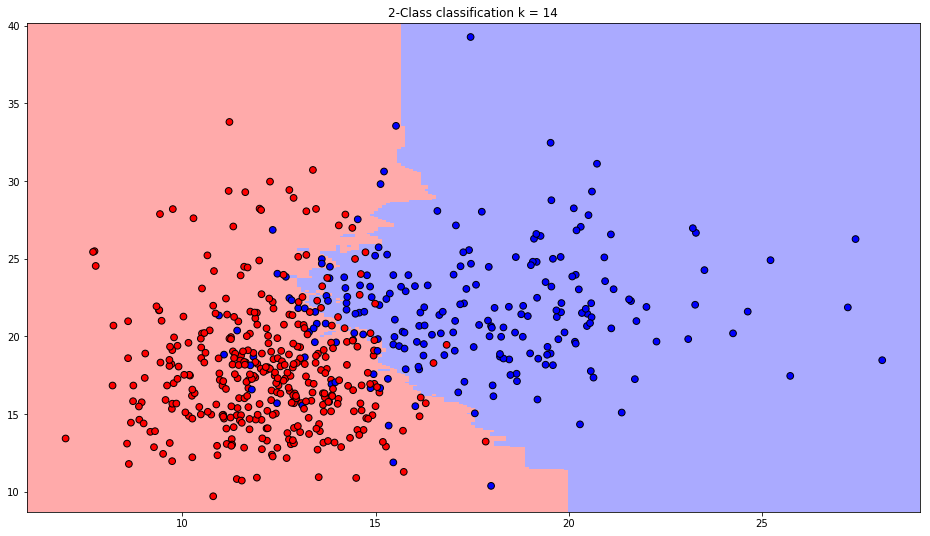

In [10]:
# Plotting decision regions
X.iloc[:,0]

# Plotting decision regions
x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


Z = wdbc_clf.predict(np.c_[xx.ravel(), yy.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z,cmap=cmap_light)


# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification k = %i"
          % (n))
plt.show()

#### 3. Describe your observations. How good is kNN in picking up the actual shape? Does it also pick up noise?
Note: unless you do cross-validation, you cannot know if the model picks up noise (overt). Here I
just ask your best judgement, not any formal analysis.

By looking at the decision boundary plot, we can say that KNN (k=14), does fairly well in predicting the decision boundary for Malignant and Benign classes as most of the observations are falling under correct decision boundary. However, we can see that a number of observations falling in the incorrect boundary which could lead to incorrect prediction in the unseen data.

## 2.2 Logistic Regression

#### 1. Fit a logistic regression model with these two features.

In [11]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression()
mod.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 2. Predict the diagnosis on a similar grid. . .

In [12]:
# Plotting decision regions
X.iloc[:,0]

# Plotting decision regions
x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Z = mod.predict(np.c_[xx.ravel(), yy.ravel()])

#### 3. . . . and create a similar plot.

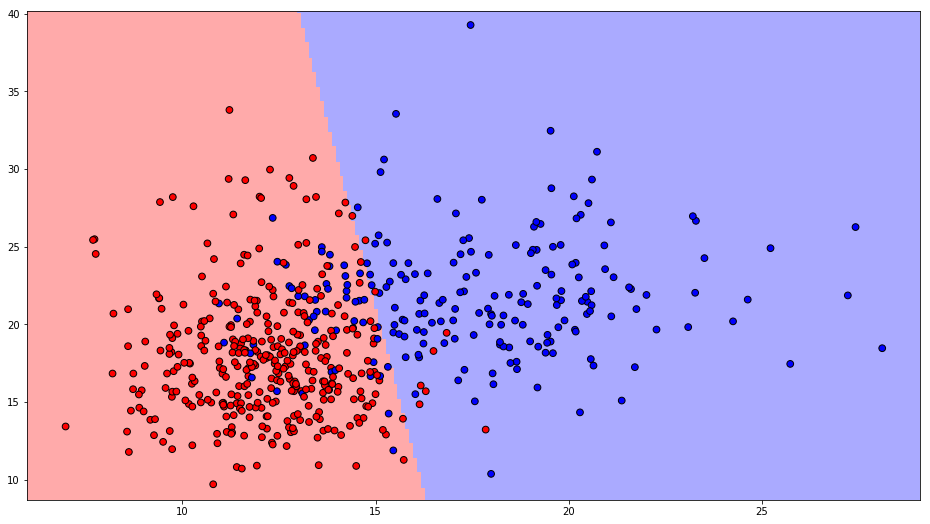

In [13]:
# Plot also the training points
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z,cmap=cmap_light)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

#### 4. Describe your observations. How does the result for kNN compare to that for Logistic Regression?

Based on the above plot, we observe that in Logistic Regression, we see a sharp boundary betwwen the two classes as compared to KNN model which had curves around the boundary based on the predicted probabilities. We can't really compare which model does better based on the above plots as it has to be validated using Cross Validation to determine the accuracy.

## 2.3 Feature Engineering

#### 1. Use these two features to compute some new ones. Let's denote your original features by x and y.
Examples you may create include: x2, y2, xy, 1(x > 5), 1(y < 1) x2, log x . . . You can use all sorts of
mathematical operations as long as a) you only use x and y, not other features, and b) the original
and the engineered features remain linearly independent (they are, unless you create features like
  x +   y).

In [14]:
wdbc_reduced['rm_t'] = wdbc_reduced['radius.mean'] > 10 + 0
wdbc_reduced['tx_t'] = np.where(wdbc_reduced['texture.mean'] < 1, 1, 0)

wdbc_reduced['rm_log'] = np.log(wdbc_reduced['radius.mean'])
wdbc_reduced['tx_log'] = np.log(wdbc_reduced['texture.mean'])

#### 2. Fit a logistic regression model. However, this time pick both x, y, and some of your engineered features.

In [15]:
X = pd.DataFrame(wdbc_reduced,columns=['radius.mean','texture.mean','rm_log','tx_log'])
y = wdbc_reduced['diagnosis']

mod = LogisticRegression()
mod.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 3. Create the decision boundary plot.

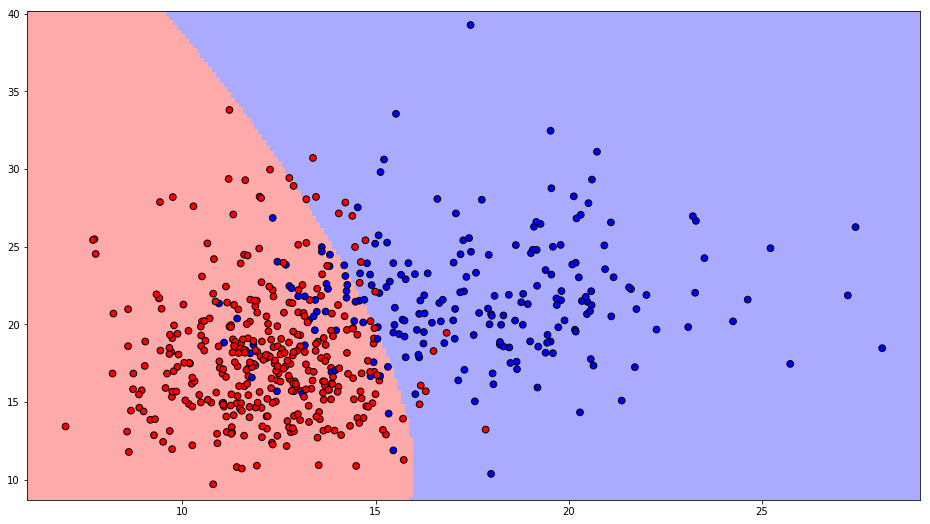

In [16]:
# Plotting decision regions
X.iloc[:,0]

# Plotting decision regions
x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

uu = np.log(xx)
vv = np.log(yy)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Z = mod.predict(np.c_[xx.ravel(), yy.ravel(), uu.ravel(),vv.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
Z.shape
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z,cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=45)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

#### 4. Comment on the shape of the boundary. What do you think, how well can you capture the actual boundary? What about overfitting? (Again, I ask about your judgement, not about any formal analysis).

We see more curved boundary with scaled featured added in Logistic Regression as compared to KNN model and Logistic Regfression with no scaled features. Though, by looking at the plot it is difficult to say if this model performs better than the two above as we still see some of the malignant cases falling in the benign region of the graph and vice versa. Additionally, it leads to more number of benign cases detected in the malignant region which in my opinion should still be better than detecting a malignant case as benign.

#### 5. Repeat the exercise a few times where you pick/engineer different new features, and try to get as reasonable boundary as you can.
As above, I am asking reasonable boundary in the sense of your best judgement. No actual cross
validation is necessary.

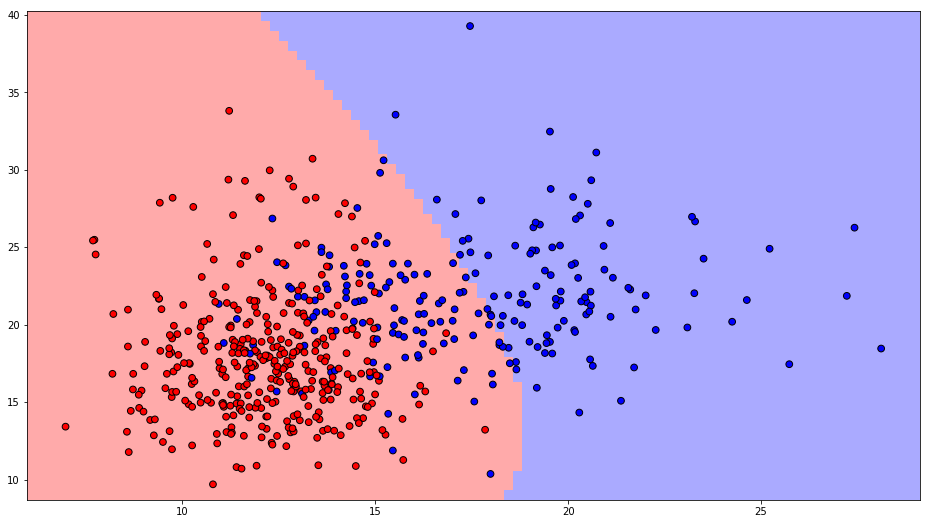

In [17]:
X = pd.DataFrame(wdbc_reduced,columns=['radius.mean','texture.mean','rm_t','tx_log'])
y = wdbc_reduced['diagnosis']

mod = LogisticRegression()
mod.fit(X,y)

# Plotting decision regions
X.iloc[:,0]

# Plotting decision regions
x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

uu = np.log(xx)
vv = np.log(yy)

from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Z = mod.predict(np.c_[xx.ravel(), yy.ravel(), uu.ravel(),vv.ravel()])


# Put the result into a color plot
Z = Z.reshape(xx.shape)
Z.shape
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z,cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=45)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

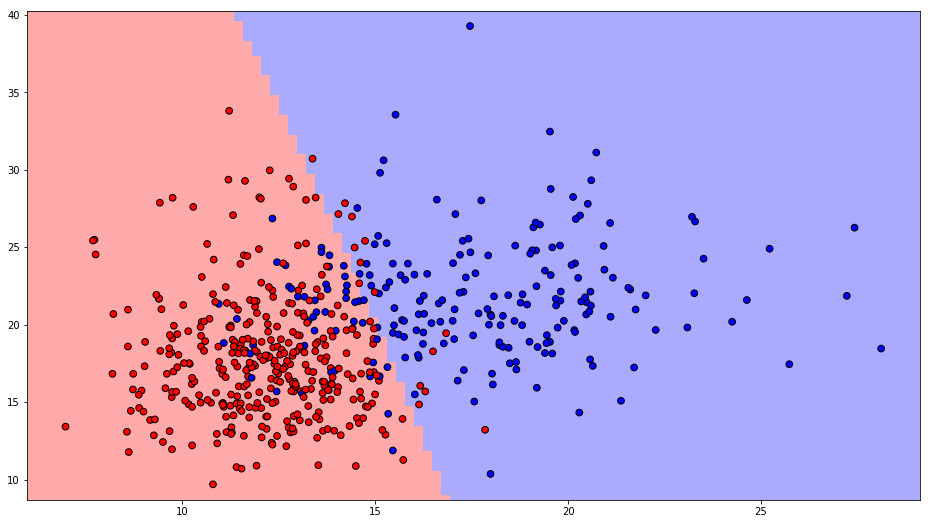

In [18]:
X = pd.DataFrame(wdbc_reduced,columns=['radius.mean','texture.mean','rm_log','tx_t'])
y = wdbc_reduced['diagnosis']


mod = LogisticRegression()
mod.fit(X,y)

# Plotting decision regions
X.iloc[:,0]

# Plotting decision regions
x_min, x_max = X.iloc[:,0].min() - 1, X.iloc[:,0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

uu = np.log(xx)
vv = np.log(yy)

from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Z = mod.predict(np.c_[xx.ravel(), yy.ravel(), uu.ravel(),vv.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
Z.shape
plt.figure(figsize=(16,9))
plt.pcolormesh(xx, yy, Z,cmap=cmap_light)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=45)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## 3.1 Cross Validation

#### 1. You should do k-fold CV (k > 10) with the following tasks:
(a) Fit logistic regression model on training data using all existing features. You may also add your
engineered features if you wish.
(b) Calculate accuracy, precision and recall on the validation data.

In [19]:
k = 12
indices = np.arange(len(wdbc_reduced))

a = np.empty(k)
p = np.empty(k)
r = np.empty(k)

for i in range(k):
    itest = indices[i::k]
    itrain = list(set(indices).difference(itest))
    testDat = wdbc_reduced.iloc[itest]
    trainDat = wdbc_reduced.iloc[itrain]
    m1 = LogisticRegression().fit(trainDat.drop(['diagnosis'],axis=1),trainDat['diagnosis'])
    preds = m1.predict(testDat.drop(['diagnosis'],axis=1))
    a[i] = sklearn.metrics.accuracy_score(testDat['diagnosis'],preds)
    p[i] = sklearn.metrics.precision_score(testDat['diagnosis'],preds)
    r[i] = sklearn.metrics.recall_score(testDat['diagnosis'],preds)

#### 2. Report the average accuracy, precision, and recall over your CV runs.

In [20]:
print("Avg. Accuracy:",np.mean(a))
print("Avg. Precision:",np.mean(p))
print("Avg. Recall:",np.mean(r))

Avg. Accuracy: 0.952681737589
Avg. Precision: 0.951554202377
Avg. Recall: 0.914218643485


## 3.2 Regularization

#### 1. Pick a type of regularization (lasso, ridge, elastic net).
#### 2. Create a wide list of regularization parameters. And I mean wide, for instance ranging from 10-6 to 10+6. Pick a number of values lambda inside this range.

In [21]:
C = [0.000001, 0.01, 1, 10, 100, 100000, 1000000]
l = [1/c for c in C]
l

[1000000.0, 100.0, 1.0, 0.1, 0.01, 1e-05, 1e-06]

#### 3. For each lambda in this range, repeat the CV process in exercise 3.1 above. Compute accuracy, precision, recall.
#### 4. Report the results as a function of . This may be in the form of a table or a graph.


In [22]:
k = 12

indices = np.arange(len(wdbc_reduced))

def CV(C,k):
    
    a = np.empty(k)
    p = np.empty(k)
    r = np.empty(k)
    
    for i in range(k):
        itest = indices[i::k]
        itrain = list(set(indices).difference(itest))
        testDat = wdbc_reduced.iloc[itest]
        trainDat = wdbc_reduced.iloc[itrain]
        m1 = LogisticRegression(penalty='l2',C=C).fit(trainDat.drop(['diagnosis'],axis=1),trainDat['diagnosis'])
        preds = m1.predict(testDat.drop(['diagnosis'],axis=1))
        a[i] = sklearn.metrics.accuracy_score(testDat['diagnosis'],preds)
        p[i] = sklearn.metrics.precision_score(testDat['diagnosis'],preds)
        r[i] = sklearn.metrics.recall_score(testDat['diagnosis'],preds)
    
    
    return (np.mean(a),np.mean(p),np.mean(r))

In [23]:
v = []
b = []
n = []

for c in C:
    x, y, z = CV(c,k)
    v.append(x)
    b.append(y)
    n.append(z)
    
df = pd.DataFrame({'Lambda':l,'Accuracy':v,'Precision':b,'Recall':n})

df2 = pd.DataFrame(data=df, columns=['Lambda','Accuracy','Precision','Recall'])
df2


,Lambda,Accuracy,Precision,Recall
0,1000000.000000,0.905068,0.933980,0.808534
1,100.000000,0.928044,0.937060,0.857450
2,1.000000,0.952682,0.951554,0.914219
3,0.100000,0.956228,0.952409,0.925531
4,0.010000,0.959700,0.952409,0.935948
5,0.000010,0.961436,0.948474,0.944719
6,0.000001,0.961436,0.948474,0.944719


#### 5. Report the best regularization parameters, and the best results.

In [24]:
df2.iloc[-1]

Lambda       0.000001
Accuracy     0.961436
Precision    0.948474
Recall       0.944719
Name: 6, dtype: float64

## 4 ROC curve: which estimator is the best

#### 1. Split your data into testing and training sets (you may use sklearn.model_selection.train_test_split), say 1/3 for testing. Use all the features in the original data.

In [25]:
wdbc_reduced['rm_log'] = np.log(wdbc_reduced['radius.mean'])
wdbc_reduced['tx_log'] = np.log(wdbc_reduced['texture.mean'])

X = wdbc_reduced.drop(['diagnosis'], axis=1)
y = wdbc_reduced['diagnosis']

X1 = wdbc1.drop(['diagnosis'], axis=1) 
y1 = wdbc1['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33, random_state=42)

#### 2. Using your training data, estimate (a few) k-NN models, Naive Bayes model, and logistic regression.
Notes: in case of k-NN, you should use scaled features. In case of logistic regression, use the optimal
regularization parameter value you found in 3.2.

In [26]:
## k-NN Model
p = 1

## K = 10
k = 10
mod1 = KNeighborsClassifier(n_neighbors=k,p=p)
mod1.fit(X_train,y_train)

## K = 15
k = 15
mod2 = KNeighborsClassifier(n_neighbors=k,p=p)
mod2.fit(X_train,y_train)

## K = 4
k = 4
mod3 = KNeighborsClassifier(n_neighbors=k,p=p)
mod3.fit(X_train,y_train)

# Naive Bayes Model
mod4 = GaussianNB()
mod4.fit(X_train1,y_train1)

# Logistic Regression Model
mod5 = LogisticRegression(penalty='l2', C = 1000000)
mod5.fit(X_train1,y_train1)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### 3. For each of the models, predict the probabilites on the test data.
Note: you have to use predict_proba, not predict for logistic and NB regression.

In [27]:
## k-NN Model
## K = 10
Z1 = mod1.predict_proba(X_test)

## K = 15
Z2 = mod2.predict_proba(X_test)

## K = 4
Z3 = mod3.predict_proba(X_test)

# Naive Bayes Model
Z4 = mod4.predict_proba(X_test1)

# Logistic Regression Model
Z5 = mod5.predict_proba(X_test1)

#### 4. Pick a number of thresholds between 0 and 1 (for instance, 0, 0.1, 0.2, ...). For each model and each threshold, treat your predictions to be 1 if it it's probability is at least as big as the threshold.

#### 5. Based on these predictions, compute false positive rate and true positive rate.

#### 6. Plot these rates for each threshold and model.

In [28]:
def roc_curve(xtest, ytest, classifier):
    nsteps = 50
    tp = np.empty((nsteps,1))
    fp = np.empty_like(tp)
    haty = classifier.predict_proba(xtest)[:,1]  # Get predicted probabilities on the test data
    for i, threshold in enumerate(np.linspace(0, 1, nsteps)):  # Create increments for threshold
        # Compute True Positve and False Positive rate
        tp[i] = np.sum(np.logical_and(ytest == 1, haty > threshold))/np.sum(ytest)
        fp[i] = np.sum(np.logical_and(ytest == 0, haty > threshold))/np.sum(ytest == 0)
    return fp, tp

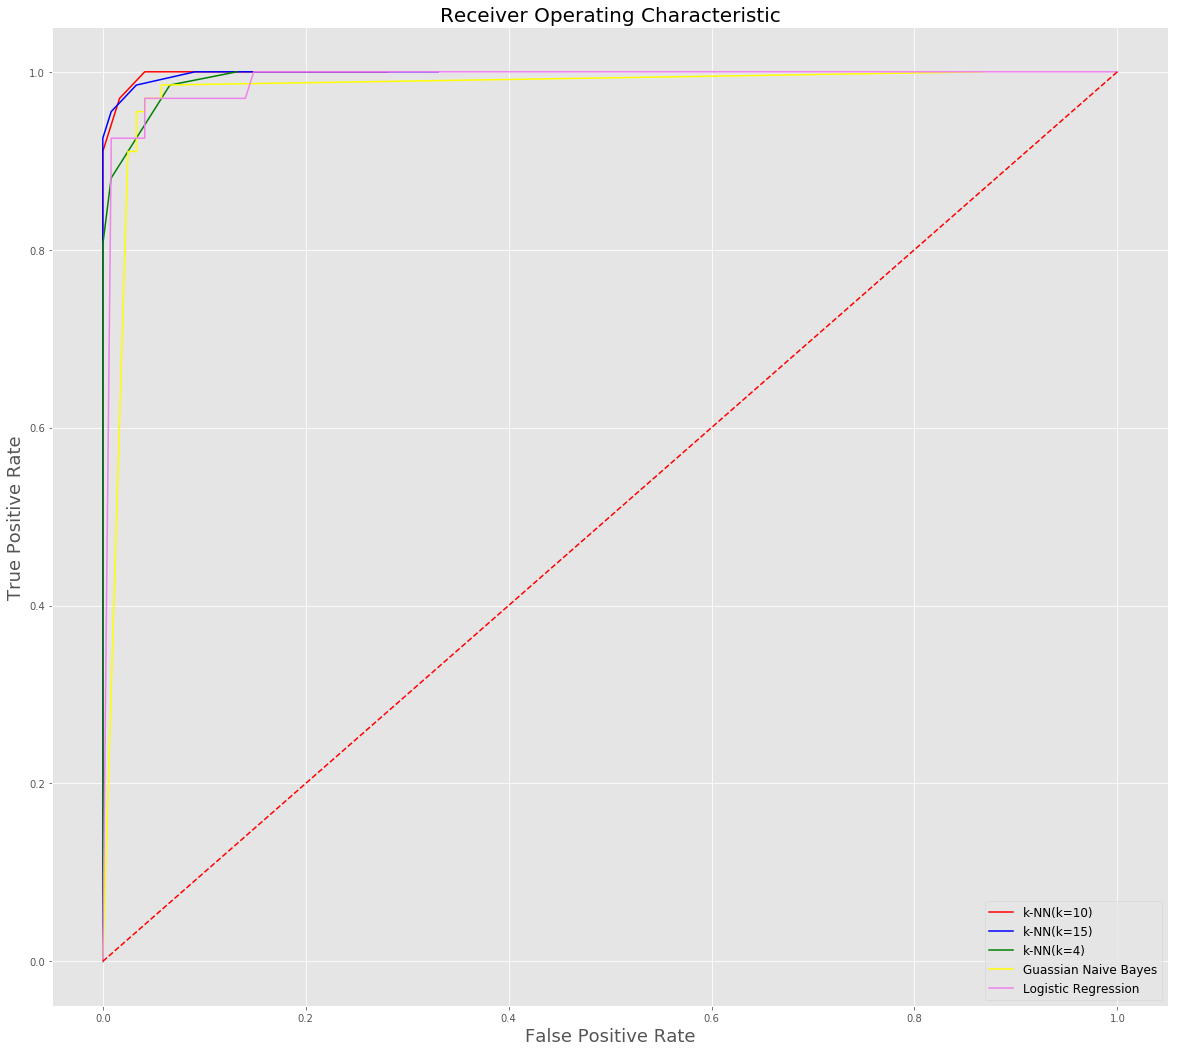

In [29]:
FP_Rate1,TP_Rate1 = roc_curve(X_test,y_test,mod1)
FP_Rate2,TP_Rate2 = roc_curve(X_test,y_test,mod2)
FP_Rate3,TP_Rate3 = roc_curve(X_test,y_test,mod3)
FP_Rate4,TP_Rate4 = roc_curve(X_test1,y_test1,mod4)
FP_Rate5,TP_Rate5 = roc_curve(X_test1,y_test1,mod5)

plt.style.use('ggplot')
plt.figure(figsize=(20,18))
plt.title('Receiver Operating Characteristic', fontsize=20)
plt.plot(FP_Rate1,TP_Rate1,label="k-NN(k=10)", color='red')
plt.plot(FP_Rate2,TP_Rate2,label="k-NN(k=15)", color='blue')
plt.plot(FP_Rate3,TP_Rate3,label="k-NN(k=4)", color='green')
plt.plot(FP_Rate4,TP_Rate4,label="Guassian Naive Bayes", color='yellow')
plt.plot(FP_Rate5,TP_Rate5,label="Logistic Regression", color='violet')
plt.plot([0,1],[0,1],'r--')
plt.legend(loc=4, fontsize=12)
plt.ylabel('True Positive Rate',fontsize=18)
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()

#### 7. Comment your results. Which model is the best?

Based on above ROC curves, **Logistic Regression** model is performing better as compared to other models as the area under the ROC curve is maximum for these two models. The next best model would be Guassian Naive Bayes as that has the maximum area under the curve. Based on the decision boudaries plotted, I was of the opinion that kNN was performing better as compared to Logistic Regression however, we really can't select a model based on decision boundaries.